In [40]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [41]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [42]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [43]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [44]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [45]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [46]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [47]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 179ms/step - loss: 0.5398 - accuracy: 0.7867 - val_loss: 0.4156 - val_accuracy: 0.8712
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3339 - accuracy: 0.8998 - val_loss: 0.3247 - val_accuracy: 0.8814
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2420 - accuracy: 0.9235 - val_loss: 0.2812 - val_accuracy: 0.8922
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1898 - accuracy: 0.9403 - val_loss: 0.2813 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1550 - accuracy: 0.9515 - val_loss: 0.2975 - val_accuracy: 0.8814
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1276 - accuracy: 0.9614 - val_loss: 0.2861 - val_accuracy: 0.8898
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1081 - accuracy: 0.9655 - val_loss: 0.2982 - val_accuracy: 0.8867
Epoch 8/20
3

In [48]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

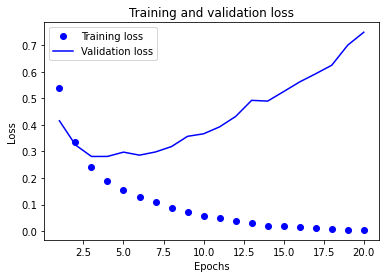

In [49]:
 import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

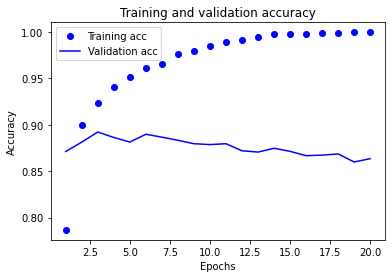

In [50]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [51]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 20ms/step - loss: 0.4573 - accuracy: 0.8291
Epoch 2/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2656 - accuracy: 0.9099
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2038 - accuracy: 0.9287
Epoch 4/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1715 - accuracy: 0.9396


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.